In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter

In [30]:
run_path = '../'
test_name = 'Heat_Eq_1+1D'

test_path = os.path.join(run_path, test_name)

In [31]:
late_stage = 8000

In [32]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
runs

['CKAN_128',
 'CKAN_16',
 'CKAN_32',
 'CKAN_64',
 'CKAN_8',
 'CKAN_A_16',
 'CKAN_A_32',
 'CKAN_A_64',
 'CKAN_A_8',
 'FCN_128',
 'FCN_32',
 'FCN_8',
 'FCN_A_128',
 'FCN_A_32',
 'FCN_A_8',
 'LKAN_128',
 'LKAN_16',
 'LKAN_32',
 'LKAN_64',
 'LKAN_8',
 'LKAN_A_16',
 'LKAN_A_32',
 'LKAN_A_64',
 'LKAN_A_8']

In [33]:
analyser = RunAnalyser(runs, test_path)

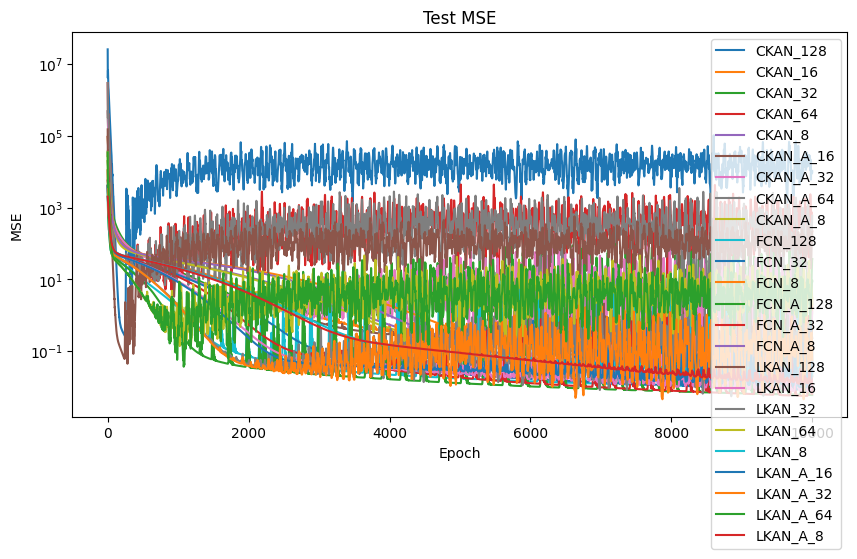

Late stage variances:
CKAN_128: 0.6714
CKAN_16: 1.7216
CKAN_32: 1.3562
CKAN_64: 0.8290
CKAN_8: 0.4714
CKAN_A_16: 1.6316
CKAN_A_32: 1.2655
CKAN_A_64: 0.9119
CKAN_A_8: 0.6648
FCN_128: 3.5592
FCN_32: 2.5166
FCN_8: 0.4582
FCN_A_128: 3.6324
FCN_A_32: 3.1012
FCN_A_8: 0.7092
LKAN_128: 0.5152
LKAN_16: 1.5373
LKAN_32: 1.2420
LKAN_64: 0.7930
LKAN_8: 0.1847
LKAN_A_16: 0.8919
LKAN_A_32: 1.1193
LKAN_A_64: 0.6822
LKAN_A_8: 0.2285


In [34]:
# Plot all models
analyser.plot_mses()
analyser.print_late_variances()

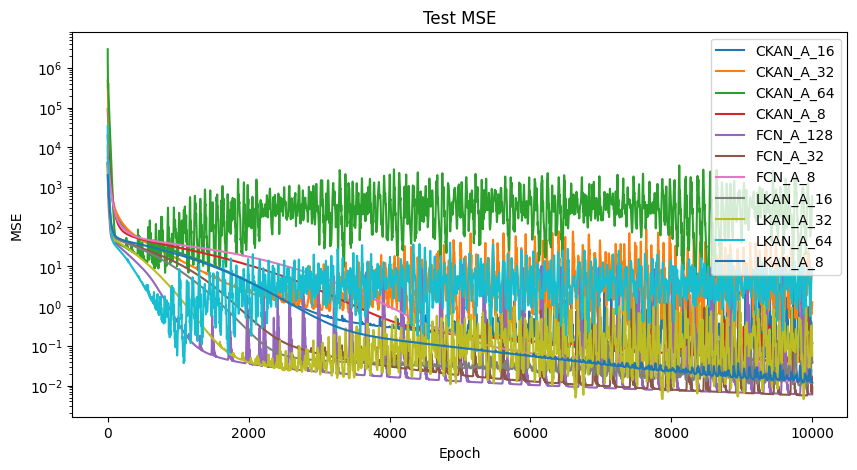

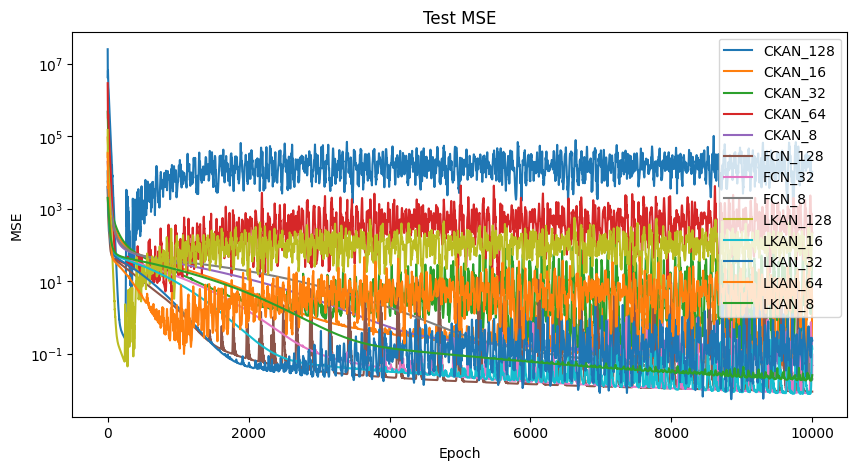

(None, None)

In [35]:
analyser.plot_mses(filter=adaptive_filter), analyser.plot_mses(filter=non_adaptive_filter)

# Non-adaptive analysis

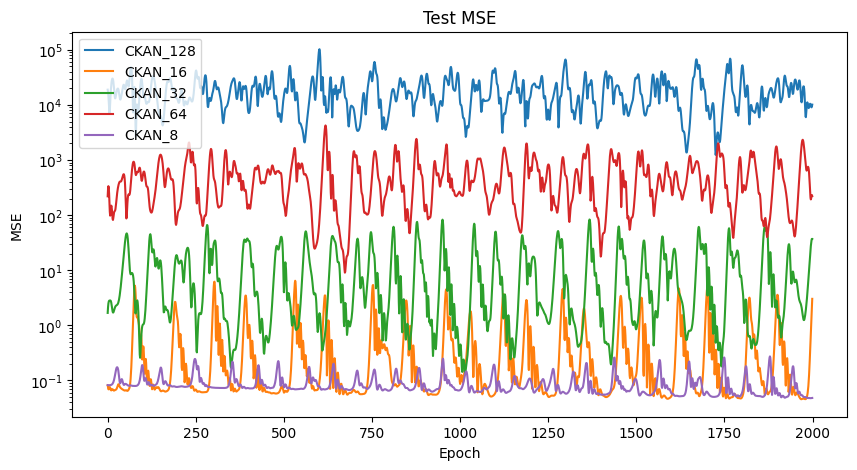

Mean absolute changes:
CKAN_128: 1878.9734
CKAN_16: 0.1054
CKAN_32: 1.6772
CKAN_64: 59.3689
CKAN_8: 0.0046


In [39]:
non_adaptive_ckans = lambda x: model_filter(x, 'CKAN') and non_adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=non_adaptive_ckans, start=late_stage)
analyser.print_mean_absolute_change(filter=non_adaptive_ckans, start=late_stage)

CKAN_8 is best

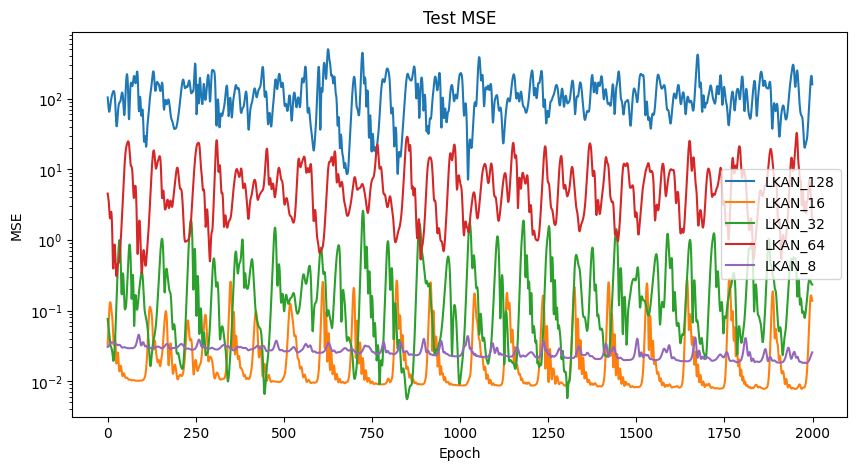

Mean absolute changes:
LKAN_128: 11.6716
LKAN_16: 0.0049
LKAN_32: 0.0391
LKAN_64: 0.6361
LKAN_8: 0.0004


In [38]:
non_adaptive_lkans = lambda x: model_filter(x, 'LKAN') and non_adaptive_filter(x)
analyser.plot_mses(filter=non_adaptive_lkans, start=late_stage)
analyser.print_mean_absolute_change(filter=non_adaptive_lkans, start=late_stage)

8 and 16 are similar

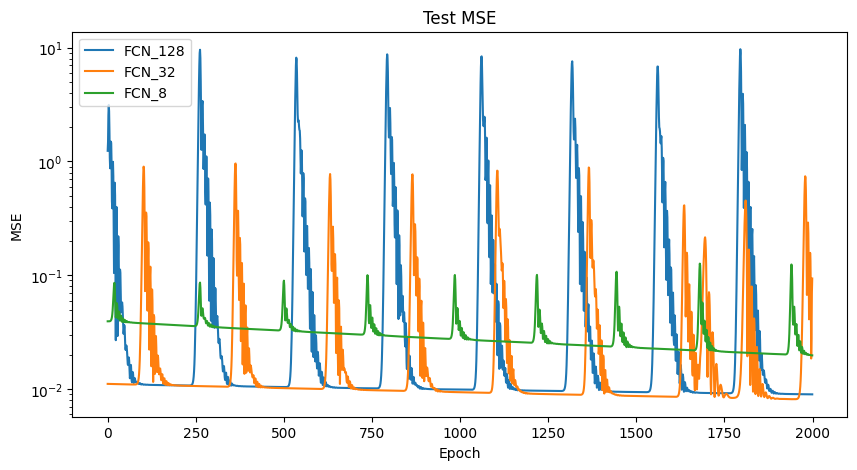

Mean absolute changes:
FCN_128: 0.0894
FCN_32: 0.0104
FCN_8: 0.0010


In [40]:
non_adaptive_fcns = lambda x: model_filter(x, 'FCN') and non_adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=non_adaptive_fcns, start=late_stage)
analyser.print_mean_absolute_change(filter=non_adaptive_fcns, start=late_stage)

All are fairly unstable, 8 seems best

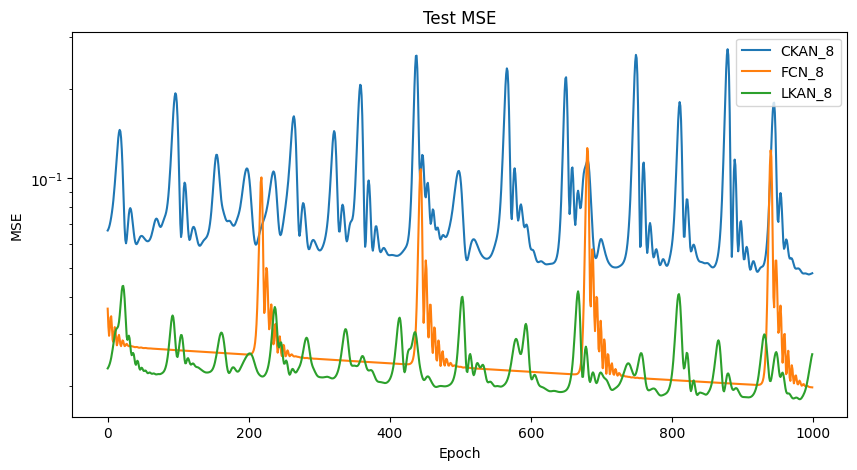

Mean absolute changes:
CKAN_8: 0.0046
FCN_8: 0.0010
LKAN_8: 0.0004


In [42]:
d = ['FCN_8', 'CKAN_8', 'LKAN_8']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=9000)
analyser.print_mean_absolute_change(filter=f, start=late_stage)

fcn and lkan are the same, lkan is more stable

# Adaptive analysis

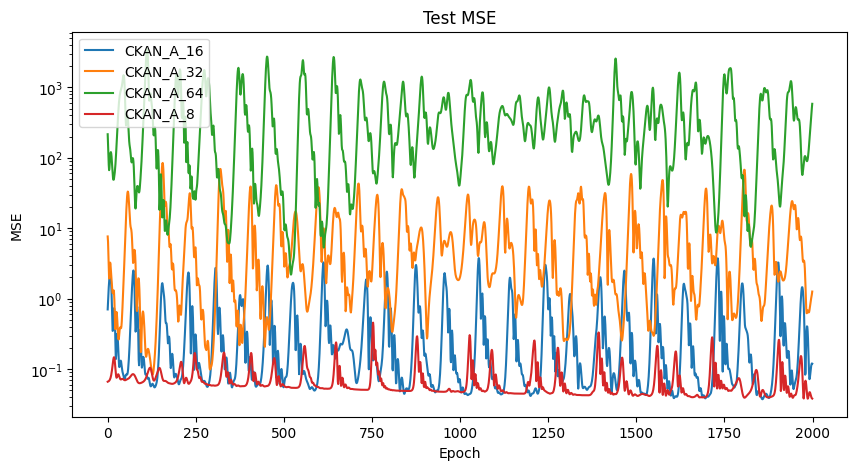

Mean absolute changes:
FCN_128: 0.0894
FCN_32: 0.0104
FCN_8: 0.0010


In [43]:
adaptive_ckans = lambda x: model_filter(x, 'CKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x
analyser.plot_mses(filter=adaptive_ckans, start=late_stage)
analyser.print_mean_absolute_change(filter=non_adaptive_fcns, start=late_stage)

8 is best, 16 is good

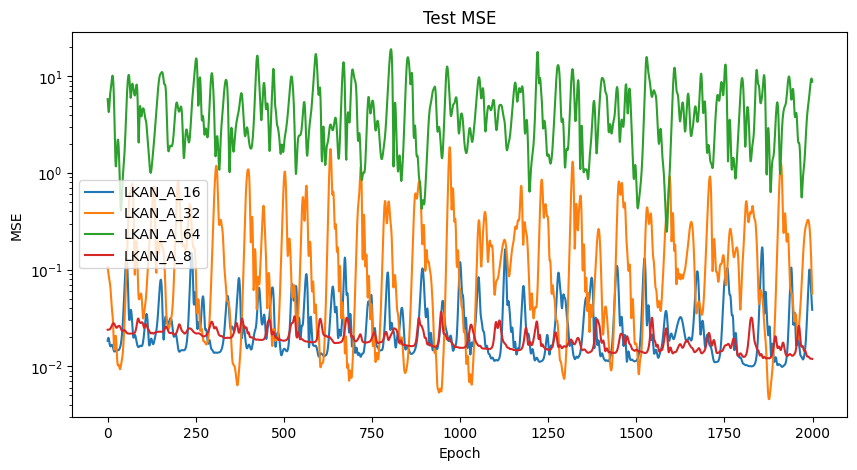

Mean absolute changes:
LKAN_A_16: 0.0028
LKAN_A_32: 0.0272
LKAN_A_64: 0.4697
LKAN_A_8: 0.0004


In [45]:
adaptive_lkans = lambda x: model_filter(x, 'LKAN') and adaptive_filter(x)# and '_128' not in x and '_8' not in x #  and '_8' not in x
analyser.plot_mses(filter=adaptive_lkans, start=late_stage)
analyser.print_mean_absolute_change(filter=adaptive_lkans, start=late_stage)

8 is bes, 16 is also ok

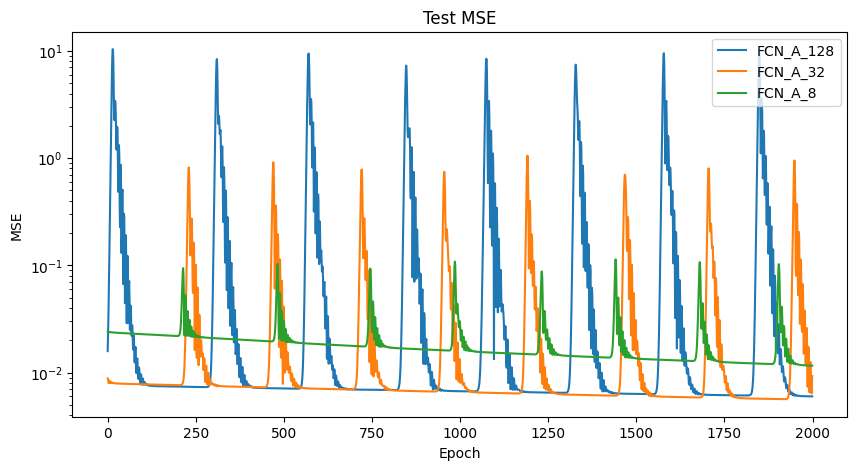

Mean absolute changes:
FCN_A_128: 0.1039
FCN_A_32: 0.0101
FCN_A_8: 0.0011


In [47]:
adaptive_fcns = lambda x: model_filter(x, 'FCN') and adaptive_filter(x) #and '_128' not in x
analyser.plot_mses(filter=adaptive_fcns, start=late_stage)
analyser.print_mean_absolute_change(filter=adaptive_fcns, start=late_stage)

8 is best bet

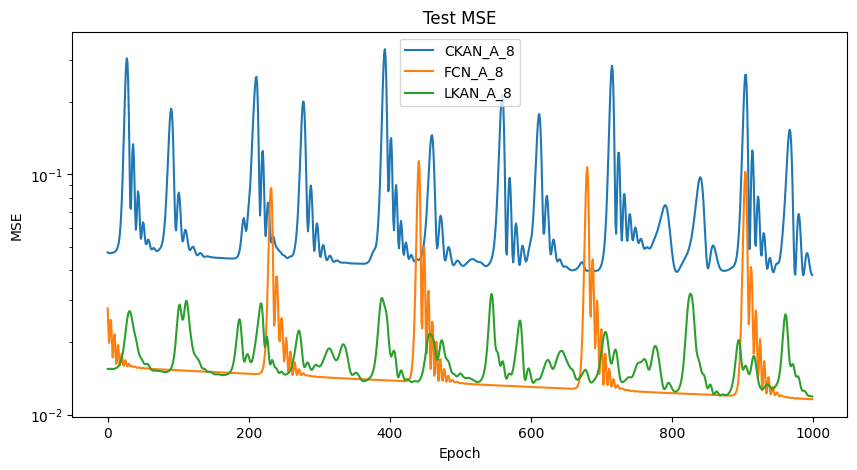

Mean absolute changes:
CKAN_A_8: 0.0050
FCN_A_8: 0.0011
LKAN_A_8: 0.0004


In [49]:
d = ['FCN_A_8', 'CKAN_A_8', 'LKAN_A_8']
f = lambda x: x in d
analyser.plot_mses(filter=f, start=9000)
analyser.print_mean_absolute_change(filter=f, start=late_stage)

lkan is best and most stable

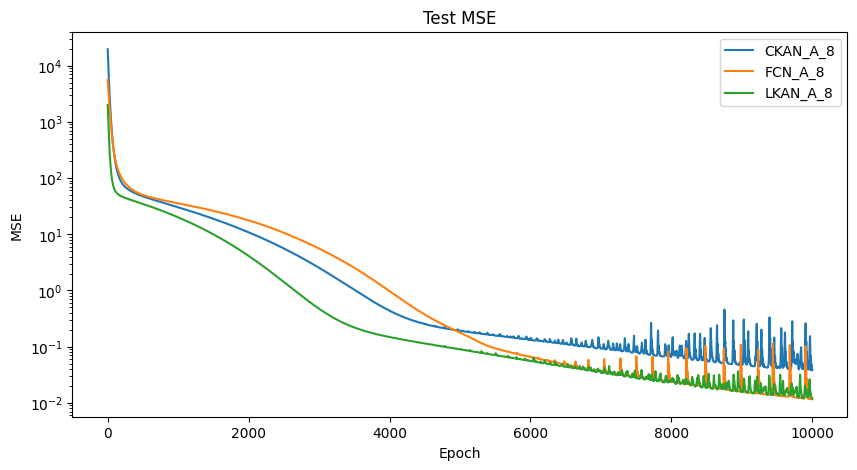

In [50]:
d = ['FCN_A_8', 'CKAN_A_8', 'LKAN_A_8']
f = lambda x: x in d
analyser.plot_mses(filter=f)